For this assignment, you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you in D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. The second part of assignment 3 has 50 points.


## Exercise 
1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.



### Github & D2L Submissions
Please create a **public** github repo and submit your answers on both **public github** and on **D2L**. Please include the link to your github repo in your submission. 

**Please follow the below guidelines regarding your github repository:**

The folder structure of your github account should be as followed:
                    
    ├── src                     # Source files (your python code)
    ├── data                    # Data related to the project (titanic.csv)
    ├── result                  # Result of the project (e.g., plots, reports)
    └── doc                     # Documentation files (additional documentations)

You must add **README.md** file to the root repository of your GitHub and explain all the directories in your GitHub repo in README file. Please look at this link as a [reference](https://help.github.com/en/github/creating-cloning-and-archiving-repositories/about-readmes) on how to write the README file.

Here is another great resource for organizing your folder and code on github. Reso

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, your final report and the structure of your github repo. 

In [2]:
#Importing the Libraries
import numpy as np 
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

#Reading the dataset
titanic = pd.read_csv("titanic.csv")
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


We can see that the input dataset has 891 observations/passengers. The mean age of the passengers in 29.6 yrs. Also we can see that 38.3% of the passengers on board the Titanic survived.

In [103]:
#correlation between 'Survived' and other variables
corr_mat=titanic.corr(method = 'pearson')
corr_mat.iloc[[1]]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,-0.005007,1.0,-0.338481,-0.077221,-0.035322,0.081629,0.257307


### Hypothesis 1 : Is survival rate associated with the class of passenger ?

In [5]:
'''select class and Survived columns and group by class and then get the mean to actually get percentage of
passengers in each class who survived'''
titanic[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


We can clearly see that passengers in the first class had the maximum chances of survival at 62.9% whereas passengers in the 3rd class had the least chances of survival at 24.2%. The **Bar Chart below depicts these survival percentages based on the class**.

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

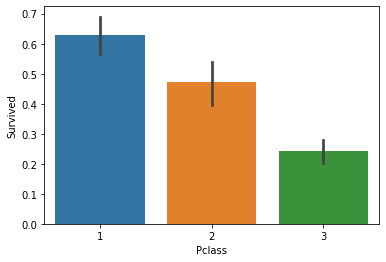

In [6]:
sns.barplot(x='Pclass', y='Survived', data=titanic)

### Hypothesis 2 : Is the survival rate associated to the gender?

In [108]:
#chances of survival based on Gender and Class
round(titanic.groupby(['Sex', 'Pclass'])[['Survived']].mean() * 100,2)

Survived
Sex    Pclass          
female 1          96.81
       2          92.11
       3          50.00
male   1          36.89
       2          15.74
       3          13.54

In [8]:
#Chances of survival based on Gender
titanic.groupby(['Sex'])['Survived'].mean() * 100

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In Hypothesis 1 test we noticed that passengers in 1st class had a higher survival rate and here we can see that gender is also related to the survival rate. Females in First class had the maximum chances of survival at 96%. In general females had a survival rate of 74.20% compared to males who had a survival rate of 18.89%.The **Bar Chart below depicts the survival rates based on Sex/Gender**.

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

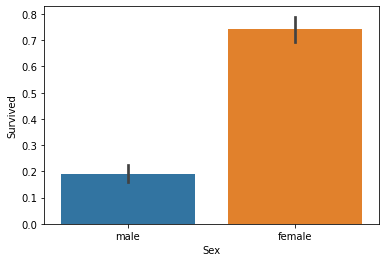

In [9]:
sns.barplot(x='Sex', y='Survived', data=titanic)

### Hypothesis 3 : Is the survival rate associated to the age?

In [70]:
#create a dataframe with age and survived columns and remove missing values
df_age = titanic[['Age' , 'Survived']].dropna(how='any')
#round of age to integer value
df_age['Age'] = (np.floor(df_age['Age'])).astype(int)
'''create a list containing unique age values; this list will act as index in new dataframe containing 
survival percentage for each age'''
ages_list = df_age['Age'].unique()
ages_list.sort()
ages_list

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 70,
       71, 74, 80])

In [71]:
#create dataframe with survival percentage for each age as index
df_survival_age = pd.DataFrame(index=ages_list, columns=['Survived', 'Deaths', 'Total', 'Percentage'])
df_survival_age['Survived'] = df_age.groupby('Age')['Survived'].sum()
df_survival_age['Total'] = df_age.groupby('Age').count()
df_survival_age['Deaths'] = df_survival_age['Total'] - df_survival_age['Survived']
df_survival_age['Percentage'] = round((df_survival_age['Survived'] / df_survival_age['Total']) * 100, 2)
df_survival_age.tail(10)

,Survived,Deaths,Total,Percentage
61,0,3,3,0.0
62,2,2,4,50.0
63,2,0,2,100.0
64,0,2,2,0.0
65,0,3,3,0.0
66,0,1,1,0.0
70,0,3,3,0.0
71,0,2,2,0.0
74,0,1,1,0.0
80,1,0,1,100.0


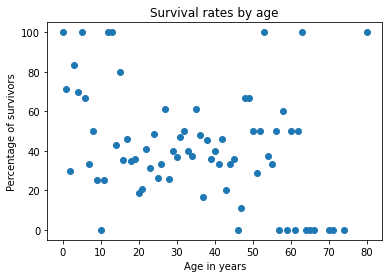

In [61]:
#create a scatter plot for age vs survival percentage
x = df_survival_age['Percentage'].index
y = df_survival_age['Percentage']
plt.scatter(x, y)
plt.title('Survival rates by age')
plt.xlabel('Age in years')
plt.ylabel('Percentage of survivors')
plt.show()

In [157]:
#delete outlier values
df_survival_age = df_survival_age.drop(df_survival_age[(df_survival_age['Percentage'] == 100) & 
                                                       (df_survival_age.index > 50)].index)

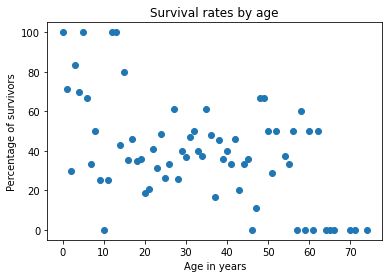

In [158]:
#Scatter Plot without outlier values
x = df_survival_age['Percentage'].index
y = df_survival_age['Percentage']
plt.scatter(x, y)
plt.title('Survival rates by age')
plt.xlabel('Age in years')
plt.ylabel('Percentage of survivors')
plt.show()

In [145]:
#top 5 Ages with maximum survival percentage
df_survival_age.sort_values(by=['Percentage'],ascending=False).head(5)

,Survived,Deaths,Total,Percentage,Age
0,7,0,7,100.0,0
12,1,0,1,100.0,12
63,2,0,2,100.0,63
53,1,0,1,100.0,53
13,2,0,2,100.0,13


In [156]:
#correlation between age and survival percentage
corr_mat2=df_survival_age.corr()
corr_mat3=corr_mat2.iloc[[0]]
corr_mat3[['Age']]

,Age
Survived,-0.392468
